# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [30]:
import pandas as pd
import requests
import json
import tweepy
from timeit import default_timer as timer
import datetime as dt
import re
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [5]:
r = requests.get(url)

In [6]:
with open('image_predictions.tsv',mode='wb') as file:
    file.write(r.content)

In [3]:
df_2 = pd.read_csv('image_predictions.tsv',sep='\t')
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
# get tweet_ids
tweet_ids = df_1.tweet_id
tweet_ids = list(tweet_ids)

In [ ]:
len(tweet_ids)

In [ ]:
counter = 0
failed_tweets = {}
start_time = timer()

with open('tweet_json.txt','w') as file:
    for id_ in tweet_ids:
        counter += 1
        print(counter,": ",id_ )
        try:
            tweet = api.get_status(id_, tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json,file)
            file.write('\n')
        except tweepy.TweepyException as e:
            print('Fail')
            failed_tweets[id_] = e
            
end_time = timer()
print(end_time - start_time)


In [10]:
tweets = pd.read_json('tweet_json.txt',lines=True)
tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
with pd.option_context('max_colwidth', 200):
    display(df_1[:20])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [7]:
df_1.duplicated().sum()

0

In [8]:
# examine names which are 'None'
with pd.option_context('max_colwidth',200):
    display(df_1[['text','name']][df_1['name']=='None'].sample(10))

,text,name
1997,Lots of pups here. All are Judea Hazelnuts. Exceptionally portable. 8/10 for all https://t.co/Pa8EmpDCuI,None
2107,Silly dog here. Wearing bunny ears. Nice long tail. Unique paws. Not crazy soft but will do. Extremely agile. 7/10 https://t.co/2BnCLtJMxD,None
2338,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,None
973,Pause your cookout and admire this pupper's nifty hat. 10/10 https://t.co/RG4C9IdNJM,None
676,HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOOD DOGGI ALL THE TIME MISTAKES HAPPEN 13/10\nhttps://t.co/G2ms0A5jWM,None
1001,Pls don't send more sherks. I don't care how seemingly floofy they are. It does me so much frighten. Thank u. 11/10 https://t.co/oQqlOsla4R,None
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,None
1904,Rare submerged pup here. Holds breath for a long time. Frowning because that spoon ignores him. 5/10 would still pet https://t.co/EJzzNHE8bE,None
1886,ER... MER... GERD 13/10 https://t.co/L1puJISV1a,None
1634,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",None


In [9]:
# some ratings have decimals
with pd.option_context('max_colwidth', 200):
    display(df_1[['tweet_id','text','rating_numerator','rating_denominator']][df_1.text.str.contains(r"(\d+\.\d*\/\d+)")])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [11]:
# examine name column
df_1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [12]:
# still examining names of dogs
with pd.option_context('max_colwidth', 200):
    display(df_1[['tweet_id','text','name']][df_1['name']=='a'])

,tweet_id,text,name
56,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
649,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
801,772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
1002,747885874273214464,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a
1017,746872823977771008,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,a
1049,743222593470234624,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a
1193,717537687239008257,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,a
1207,715733265223708672,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,a
1340,704859558691414016,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,a


In [13]:
# some rating_denominator are greater than 10 from examination
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [14]:
with pd.option_context('max_colwidth', 200):
    display(df_1[['tweet_id','text','rating_denominator']][df_1['rating_denominator']==11])

,tweet_id,text,rating_denominator
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,11


**df_2**

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_2.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
df_2.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [19]:
# check for duplicates
df_2.jpg_url.duplicated().sum()

66

**df_3**

### Quality issues

`df_1 table`
1. some entries that are retweets

2. invalid datatype for `timestamp` column

3. incorrect `rating_numerators` for ratings which are decimal numbers

4. Some of `rating_denominator` are not equal to 10

5. incorrect `name` given to some dogs

6. Not all columns are necessary in `df_1` table


7. duplicated `jpg_url` in `df_2`

8. unnecessary columns in `df_3`


### Tidiness issues
1. `doggo`, `floofer`,`pupper` & `puppo` columns should be one column

2. `df_3` should be part of `df_1`

3. merge `tweets_df` with `df2_copy`

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [186]:
# Make copies of original pieces of data
df1_copy = df_1.copy()
df2_copy = df_2.copy()
df3_copy = tweets.copy()

### Issue #1: some entries that are retweets

#### Define: make drop entries which are retweets

#### Code

In [187]:
df1_copy = df1_copy[df1_copy['retweeted_status_id'].isna()]

### Test

In [188]:
df_1['retweeted_status_id'].value_counts(dropna=False)

NaN             2175
6.718968e+17       1
6.675094e+17       1
6.671828e+17       1
6.661041e+17       1
                ... 
8.250266e+17       1
7.950767e+17       1
7.840579e+17       1
8.222448e+17       1
6.675484e+17       1
Name: retweeted_status_id, Length: 182, dtype: int64

In [189]:
df1_copy[df1_copy['retweeted_status_id'].isna()]['retweeted_status_id'].value_counts(dropna=False)

NaN    2175
Name: retweeted_status_id, dtype: int64

### Issue #2: invalid datatype for `timestamp` column

#### Define: change timestamp datatype to datetime

#### Code

In [190]:
df1_copy['timestamp'] = pd.to_datetime(df1_copy['timestamp'])

#### Test

In [191]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Issue #3: incorrect `rating_numerators` for ratings which are decimal numbers

#### Define: Change datatype of `rating_numerator` to float and then correct manually

#### Code

In [192]:
# first conver datatype to float
df1_copy['rating_numerator'] = df1_copy['rating_numerator'].astype(float)

In [193]:
# get indices of affected observations
with pd.option_context('max_colwidth', 200):
    display(df1_copy[['tweet_id','text','rating_numerator','rating_denominator']][df1_copy.text.str.contains(r"(\d+\.\d*\/\d+)")])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10


In [194]:
# change entries manually
df1_copy.loc[45,'rating_numerator'] = 13.5
df1_copy.loc[695,'rating_numerator'] = 9.75
df1_copy.loc[763,'rating_numerator'] = 11.27
df1_copy.loc[1689,'rating_numerator'] = 9.5
df1_copy.loc[1712,'rating_numerator'] = 11.26

#### Test

In [195]:
# get indices of affected observations
with pd.option_context('max_colwidth', 200):
    display(df1_copy[['tweet_id','text','rating_numerator','rating_denominator']][df1_copy.text.str.contains(r"(\d+\.\d*\/\d+)")])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


### Issue #4: Some of `rating_denominator` are not equal to 10

#### Define: Create `rating` column that normalizes all the ratings using both `rating_numerator` and `rating_denominator` columns

#### Code

In [196]:
df1_copy['rating'] = 10 * df1_copy['rating_numerator']/df1_copy['rating_denominator']

#### Test

In [197]:
with pd.option_context('max_colwidth',200):
    display(df1_copy[['text','rating_numerator','rating_denominator','rating']][df1_copy.rating_denominator != 10])

,text,rating_numerator,rating_denominator,rating
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0,inf
342,@docmisterio account started on 11/15/15,11.0,15,7.333333
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70,12.000000
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7,34.285714
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150,11.000000
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11,8.181818
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170,12.000000
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20,2.000000
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50,10.000000
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90,11.000000


### Issue #5: incorrect `name` given to some dogs

#### Define: extract names of dogs using regex to new column `dog_name`, then drop `name` column

#### Code

In [198]:
df1_copy['dog_name'] = df1_copy['text'].str.extract("(This is.*named |This is |Say hello to |Meet |Here is )([A-Z]\w+)")[1]
df1_copy.drop('name',axis=1,inplace=True)

### Test

In [199]:
df1_copy.dog_name.value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Tucker         9
              ..
Geno           1
Stark          1
Beya           1
Kayla          1
Christoper     1
Name: dog_name, Length: 946, dtype: int64

### Issue #6: Not all columns are necessary in `df_1 table`

#### Define: Drop unnecessary columns

#### Code

In [200]:
df1_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'rating',
       'dog_name'],
      dtype='object')

In [201]:
df1_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                  'retweeted_status_timestamp','expanded_urls'],axis = 1, inplace=True)

### Test

In [202]:
df1_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'rating',
       'dog_name'],
      dtype='object')

### Issue #7: duplicated `jpg_urls` in df_2

#### Define: drop duplicated urls

In [203]:
df2_copy = df2_copy.drop_duplicates(subset='jpg_url')

#### Test

In [204]:
sum(df2_copy['jpg_url'].duplicated())

0

### Issue #8: unnecessary columns in df_3

In [205]:
df3_copy.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [206]:
df3_copy = df3_copy[['id','retweet_count','favorite_count']]
df3_copy

,id,retweet_count,favorite_count
0,892420643555336193,7009,33810
1,892177421306343426,5301,29330
2,891815181378084864,3481,22049
3,891689557279858688,7225,36937
4,891327558926688256,7760,35310
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


### Tidiness

### Issue #1: `doggo`, `floofer`,`pupper` & `puppo` columns should be one column

#### Define: Melt affected columns, then remove duplicates

In [207]:
list(df1_copy)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating',
 'dog_name']

In [208]:
df1_copy = pd.melt(df1_copy,id_vars=['tweet_id', 'timestamp', 'source', 'text', 
                                     'rating_numerator','rating_denominator',
                          'dog_name','rating'],var_name='dog',value_name='dog_stage')

df1_copy.drop('dog',axis=1,inplace=True)

In [209]:
# sort by dog_stage
df1_copy = sample.sort_values('dog_stage')

# remove duplicates and keep last
df1_copy = df1_copy.drop_duplicates(subset='tweet_id',keep='last')

### Test

In [210]:
df1_copy['dog_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_stage, dtype: int64

#### Code

### Issue #2: `df_3` should be part of `df_1`

#### Define: Merge two dfs, store in `tweets_df`

In [224]:
tweets_df = df1_copy.merge(df3_copy,left_on='tweet_id',right_on='id')

# drop id column
tweets_df.drop('id',axis=1,inplace=True)

### Issue #3: merge `tweets_df` with `df2_copy`

In [233]:
tweets_master_df = tweets_df.merge(df2_copy,left_on='tweet_id',right_on='tweet_id')

### Test

Compare data of merged df to the parents df

In [230]:
tweets_df.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_name,rating,dog_stage,retweet_count,favorite_count
0,667443425659232256,2015-11-19 20:44:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10,NaN,6.0,None,489,682


In [234]:
tweets_master_df.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_name,rating,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,667443425659232256,2015-11-19 20:44:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10,NaN,6.0,None,489,...,1,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False


In [235]:
df2_copy[df2_copy['tweet_id']==667443425659232256]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
78,667443425659232256,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [236]:
tweets_master_df.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [2]:
df = pd.read_csv('twitter_archive_master.csv')

In [3]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'dog_name', 'rating', 'dog_stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Questions

1. Which `dog_type` has highest amount of likes
2. What is the proportion of true predictions
3. Proportion of dog_type in dataset

### Insights & Visualizations

dog_stage
puppo      12.043478
floofer    11.875000
doggo      11.870968
pupper     10.652217
Name: rating, dtype: float64


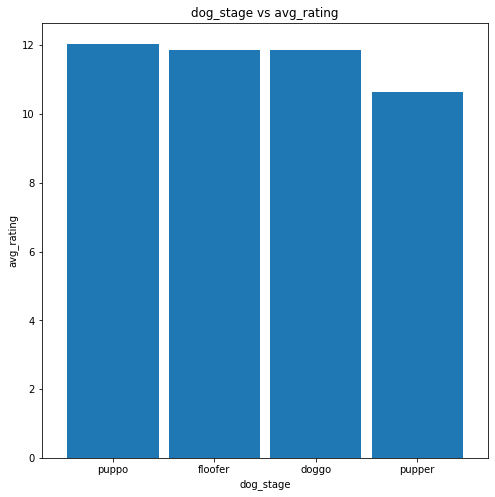

In [39]:
# proportion of dog_stage
print(df.groupby('dog_stage')['rating'].mean()[1:].sort_values(ascending = False))
df.groupby('dog_stage')['rating'].mean()[1:].sort_values(ascending = False).plot.bar(figsize=(8,8),rot=0,width=0.9)
plt.title('dog_stage vs avg_rating')
plt.ylabel('avg_rating');

Insight 1: It appears that puppos are the most beautiful for the cameras. They are followed by  floofers, then doggos and then puppers

dog_stage
puppo      20544.913043
doggo      17600.596774
floofer    11676.625000
pupper      6452.872642
Name: favorite_count, dtype: float64


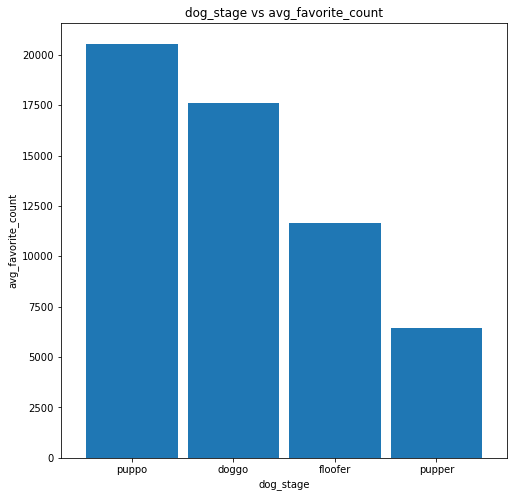

In [40]:
print(df.groupby('dog_stage')['favorite_count'].mean()[1:].sort_values(ascending = False))
df.groupby('dog_stage')['favorite_count'].mean()[1:].sort_values(ascending = False).plot.bar(figsize=(8,8),rot=0,width=0.9)
plt.title('dog_stage vs avg_favorite_count')
plt.ylabel('avg_favorite_count');

Insight 2: Puppos again are on top of the chart. This isn’t strange as their average ratings surpasses the rest. But this time, doggos come in second followed by floofers and then puppers. 

dog_stage
doggo      5973.177419
puppo      5796.173913
floofer    3837.125000
pupper     1975.311321
Name: retweet_count, dtype: float64


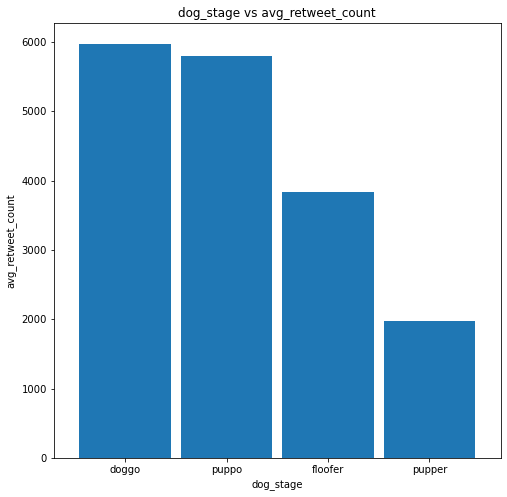

In [41]:
print(df.groupby('dog_stage')['retweet_count'].mean()[1:].sort_values(ascending = False))
df.groupby('dog_stage')['retweet_count'].mean()[1:].sort_values(ascending = False).plot.bar(figsize=(8,8),rot=0,width=0.9)
plt.title('dog_stage vs avg_retweet_count')
plt.ylabel('avg_retweet_count');

Insight 3: This time, Puppos came in second. Slightly lesser than that of Doggos. Doggos were retweeted more times than the rest of the their counterparts even though they had the second highest number of likes. Also notice the difference between the two classes in likes and retweets. Puppos beat Doggos in terms of likes by a margin greater than the margin where Doggos beat Puppos. 